# My First Notebook

Learning Pandas, Jupyter from a sample notebook provided by Ben Welsh at LA Times. Learn the basics of data journalism at this url: https://www.firstpythonnotebook.org

Add Matplotlib (data visualization library) to notebook 

In [101]:
%matplotlib inline

In [ ]:
Importing the CSV file above using the read_csv function included with pandas.

In [102]:
contribs = pd.read_csv("https://first-python-notebook.readthedocs.io/_static/contributions.csv")

In [ ]:
A quick look at what the dataframe contribs consists of.. 

In [103]:
contribs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56379 entries, 0 to 56378
Data columns (total 13 columns):
calaccess_committee_id          56379 non-null int64
committee_name                  56379 non-null object
calaccess_filing_id             56379 non-null int64
date_received                   56379 non-null object
contributor_lastname            56375 non-null object
contributor_firstname           53411 non-null object
contributor_city                56369 non-null object
contributor_state               56363 non-null object
contributor_zip                 56366 non-null object
contributor_employer            48572 non-null object
contributor_occupation          53273 non-null object
contributor_is_self_employed    56379 non-null bool
amount                          56379 non-null float64
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 5.2+ MB


In [ ]:
Adding the committees CSV file using the pandas library. 

In [104]:
props=pd.read_csv("https://first-python-notebook.readthedocs.io/_static/committees.csv")

In [ ]:
A quick look at its structure. 

In [105]:
props.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
ocd_prop_id               102 non-null object
calaccess_prop_id         102 non-null int64
ccdc_prop_id              102 non-null int64
prop_name                 102 non-null object
ccdc_committee_id         102 non-null int64
calaccess_committee_id    102 non-null int64
committee_name            102 non-null object
committee_position        102 non-null object
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [ ]:
Importing the pandas library. 

In [106]:
import pandas as pd

In [107]:
my_list = [1, 3, 5, 7, 9]

Converting a plain Python list into what pandas calls a Series. 

In [108]:
my_series = pd.Series(my_list)

In [ ]:
my_series.describe()

In [110]:
props.prop_name.value_counts().reset_index()

,index,prop_name
0,PROPOSITION 057 - CRIMINAL SENTENCES. JUVENILE...,13
1,PROPOSITION 056 - CIGARETTE TAX TO FUND HEALTH...,12
2,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,11
3,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,9
4,PROPOSITION 055 - TAX EXTENSION TO FUND EDUCAT...,8
5,PROPOSITION 067- REFERENDUM TO OVERTURN BAN ON...,7
6,PROPOSITION 062- DEATH PENALTY. INITIATIVE STA...,7
7,"PROPOSITION 059- SB 254 (CHAPTER 20, STATUTES ...",6
8,PROPOSITION 053 - REVENUE BONDS. STATEWIDE VOT...,4
9,PROPOSITION 054 - LEGISLATURE. LEGISLATION AND...,4


In [111]:
props.prop_name == 'PROPOSITION 064- MARIJUANA LEGALIZATION. INITIATIVE STATUTE.'

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
72     False
73     False
74      True
75      True
76      True
77      True
78      True
79      True
80      True
81      True
82      True
83      True
84      True
85     False
86     False
87     False
88     False
89     False
90     False
91     False
92     False
93     False
94     False
95     False
96     False
97     False
98     False
99     False
100    False
101    False
Name: prop_name, Length: 102, dtype: bool

In [112]:
prop=props[props.prop_name == 'PROPOSITION 064- MARIJUANA LEGALIZATION. INITIATIVE STATUTE.']

In [113]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 74 to 84
Data columns (total 8 columns):
ocd_prop_id               11 non-null object
calaccess_prop_id         11 non-null int64
ccdc_prop_id              11 non-null int64
prop_name                 11 non-null object
ccdc_committee_id         11 non-null int64
calaccess_committee_id    11 non-null int64
committee_name            11 non-null object
committee_position        11 non-null object
dtypes: int64(4), object(4)
memory usage: 792.0+ bytes


In [114]:
merged = pd.merge(prop, contribs, on="calaccess_committee_id")

In [115]:
merged.amount.max()

4000000.0

In [116]:
merged.committee_position.value_counts()

SUPPORT    762
OPPOSE      98
Name: committee_position, dtype: int64

In [117]:
support = merged[merged.committee_position == 'SUPPORT']

In [118]:
oppose = merged[merged.committee_position == 'OPPOSE']

In [123]:
top_supporters = support.groupby(
    ["contributor_firstname", "contributor_lastname"]
).amount.sum().reset_index().sort_values("amount", ascending=False).head(10)

In [124]:
top_supporters.head(10)

,contributor_firstname,contributor_lastname,amount
444,SEAN,PARKER AND AFFILIATED ENTITIES,7250000.0
443,SEAN,PARKER,1500000.0
102,DANIEL,LEWIS,1250000.0
180,HENRY,VAN AMERINGEN,1000000.0
374,NICHOLAS,PRITZKER,900000.0
390,PETER,THIEL,300000.0
421,ROGER,JENKINS,75000.0
22,ANGELA,HOWARD,65000.0
297,LAWRENCE,HESS,30000.0
425,ROGER B.,MCNAMEE,10000.0


[Text(0,0,'PARKER AND AFFILIATED ENTITIES'),
 Text(0,0,'PARKER'),
 Text(0,0,'LEWIS'),
 Text(0,0,'VAN AMERINGEN'),
 Text(0,0,'PRITZKER')]

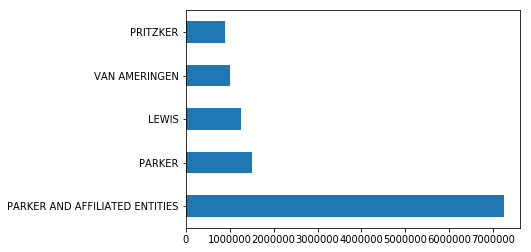

In [127]:
chart = top_supporters.head(5).amount.plot.barh()
chart.set_yticklabels(top_supporters.contributor_lastname)

In [128]:
top_supporters['contributor_fullname'] = top_supporters.contributor_firstname + " " + top_supporters.contributor_lastname

[Text(0,0,'SEAN PARKER AND AFFILIATED ENTITIES'),
 Text(0,0,'SEAN PARKER'),
 Text(0,0,'DANIEL LEWIS'),
 Text(0,0,'HENRY VAN AMERINGEN'),
 Text(0,0,'NICHOLAS PRITZKER')]

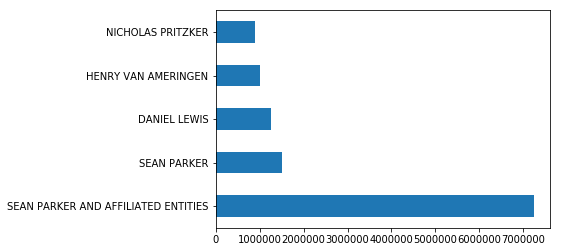

In [129]:
chart = top_supporters.head(5).amount.plot.barh()
chart.set_yticklabels(top_supporters.contributor_fullname)

In [131]:
top_supporters.head(5).to_csv("top_supporters.csv")

In [132]:
def combine_names(row):
    if row.contributor_fullname.startswith('SEAN PARKER'):
        return 'SEAN PARKER'
    return row.contributor_fullname

In [133]:
top_supporters.apply(combine_names, axis=1)

444            SEAN PARKER
443            SEAN PARKER
102           DANIEL LEWIS
180    HENRY VAN AMERINGEN
374      NICHOLAS PRITZKER
390            PETER THIEL
421          ROGER JENKINS
22           ANGELA HOWARD
297          LAWRENCE HESS
425       ROGER B. MCNAMEE
dtype: object

In [134]:
top_supporters['contributor_cleanname'] = top_supporters.apply(combine_names, axis=1)

In [136]:
top_supporters.groupby(
    "contributor_cleanname"
).amount.sum().reset_index().sort_values("amount", ascending=False).head(10)

,contributor_cleanname,amount
8,SEAN PARKER,8750000.0
1,DANIEL LEWIS,1250000.0
2,HENRY VAN AMERINGEN,1000000.0
4,NICHOLAS PRITZKER,900000.0
5,PETER THIEL,300000.0
7,ROGER JENKINS,75000.0
0,ANGELA HOWARD,65000.0
3,LAWRENCE HESS,30000.0
6,ROGER B. MCNAMEE,10000.0


In [135]:
top_supporters.groupby(
    "contributor_cleanname"
).amount.sum().reset_index().sort_values("amount", ascending=False).head(10)

,contributor_cleanname,amount
8,SEAN PARKER,8750000.0
1,DANIEL LEWIS,1250000.0
2,HENRY VAN AMERINGEN,1000000.0
4,NICHOLAS PRITZKER,900000.0
5,PETER THIEL,300000.0
7,ROGER JENKINS,75000.0
0,ANGELA HOWARD,65000.0
3,LAWRENCE HESS,30000.0
6,ROGER B. MCNAMEE,10000.0


In [ ]:
oppose.amount.sum()

In [ ]:
support.amount.sum()

In [ ]:
support.amount.sum() / merged.amount.sum()

In [ ]:
merged.sort_values("amount")

In [ ]:
merged.sort_values("amount", ascending=False).head()

In [ ]:
support.sort_values("amount", ascending=False).head(10)

In [ ]:
oppose.sort_values("amount", ascending=False).head()

In [ ]:
merged.groupby("committee_name_x").amount.sum().reset_index().sort_values("amount", ascending=False)

In [ ]:
merged.groupby(["contributor_firstname", "contributor_lastname", "committee_position"]).amount.sum().reset_index().sort_values("amount", ascending=False)